<a href="https://colab.research.google.com/github/WoogiWooks/Kaggle_ML/blob/main/%ED%9A%8C%EA%B7%80_%EC%9E%90%EC%A0%84%EA%B1%B0_%EB%8C%80%EC%97%AC_%EC%88%98%EC%9A%94_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [15]:
df = pd.read_csv('/content/drive/MyDrive/캐글/완벽가이드 예제/5장. 회귀/Bike_sharing_demand/bike_train.csv')
print(df.shape)
df

# season : 1~4 (봄~겨울)
# holiday : 0은 휴일이 아닌 날, 1은 주말제외한 공휴일
# workingday : 0은 주말 및 휴일, 1은 주중
# weather : 1은 맑음, 2는 흐림 3은 가벼운 눈/비/천둥, 4는 심한 눈/비/천둥
# atemp : 체감 온도
# casual : 등록되지 않은 사용자가 대여한 횟수
# registered : 등록된 사용자가 대여한 횟수
# count : 총 대여 횟수

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# **1차 가공**

In [16]:
""" datetime 컬럼은 문자형식으로 가공이 필요 """
""" 문자열을 년도/월/일/시간/분/초 로 변환하려면 문자열을 datetime 타입으로 변경해야 함 """
""" apply(pd.to_datetime) 사용 """


df["datetime"] = df.datetime.apply(pd.to_datetime)
df["year"] = df.datetime.apply(lambda x : x.year)
df["month"] = df.datetime.apply(lambda x : x.month)
df["day"] = df.datetime.apply(lambda x : x.day)
df["hour"] = df.datetime.apply(lambda x : x.hour)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


In [17]:
""" Count = casual+registered 이므로 두 컬럼 삭제 """
""" 상관성이 높아 예측에 악영향을 끼칠 수 있음 """
""" datetime 컬럼 삭제 """

df.drop(["datetime", "casual", "registered"], axis=1, inplace=True)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


In [6]:
""" 해당 대회에서는 RMSLE를 평가지표로 요구 """
""" 사이킷런에서는 RMSLE를 제공해주지 않아 RMSE를 통해 성능평가 함수를 직접 제작 """
""" np.log 혹은 사이킷런의 mean_squared_log_error를 사용하면 데이터 값의 크기에 따라 오류가 발생할 수 있음 """
""" 따라서 1+log 값인 log1p를 사용 """
""" log1p로 변환한 값은 exmp1()를 통해 원래 스케일로 복원 가능 """


from sklearn.metrics import mean_squared_error, mean_absolute_error # mean_squared_log_error

def rmsle(y, pred):
  log_y = np.log1p(y)
  log_pred = np.log1p(pred)
  squared_error = (log_y-log_pred)**2
  rmsle = np.sqrt(np.mean(squared_error))
  return rmsle

def rmse(y, pred):
  return np.sqrt(mean_squared_error(y, pred))

def eval_regr(y, pred):
  rmsle_val = rmsle(y, pred)
  rmse_val = rmse(y,pred)
  mae_val = mean_absolute_error(y, pred)
  print("RMSLE:", rmsle_val)
  print("RMSE:", rmse_val)
  print("MAE:", mae_val)

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = df["count"]
X_features = df.drop(["count"], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

eval_regr(y_test, pred)

RMSLE: 1.1646636237113643
RMSE: 140.89958867165444
MAE: 105.92444835099778


In [21]:
""" 실제값과 예측값과의 차이정도 확인 """

result = pd.DataFrame(y_test.values, columns=["real_count"])
result["pred_count"] = np.round(pred)
result["diff"] = np.abs(result["real_count"]-result["pred_count"])
# 차이가 큰 상위 5개 표시
print(result.sort_values("diff", ascending=False)[:5])

      real_count  pred_count   diff
1618         890       322.0  568.0
3151         798       241.0  557.0
966          884       327.0  557.0
412          745       194.0  551.0
2817         856       310.0  546.0


# **2차 가공**
* 예측 오류 발생시 확인해야 할 것
  * 1차적으로 Target값의 분포가 왜곡되었는지 확인 (정규분포가 좋음) => **log1p 를 통한 로그 변환!!**
  * 선형 회귀에서 숫자형 카테고리의 숫자 값에 영향을 크게 받음 => **숫자형 카테고리형 피쳐의 원핫인코딩 필요**
    * 숫자형 카테고리 : 숫자가 크고 작음을 의미하는 것이 아닌 것들

### **Target값 로그변환**

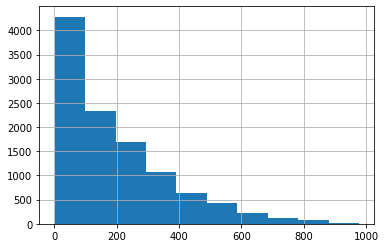

In [22]:
y_target.hist()

# 매우 불균형하고 왜곡돼 있음

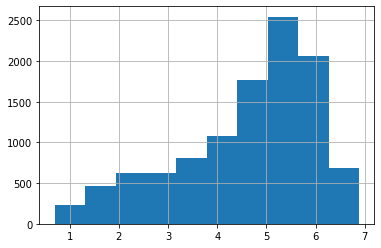

In [23]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

# 변환 전에 비해 왜곡 정도가 많이 향상됨

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_log_transform, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)


# 로그변환된 타겟값을 다시 변환
# expm1 사용

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

eval_regr(y_test_exp, pred_exp)

""" RMSLE 는 줄어들었지만 RMSE 는 오히려 향상됨 """

RMSLE: 1.0168265982003497
RMSE: 162.59426809004776
MAE: 109.28615860077622


### **카테고리형 피쳐 인코딩**

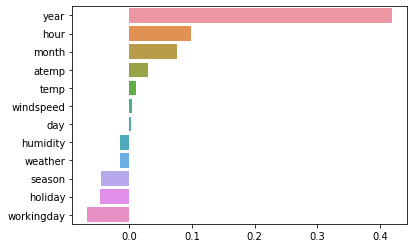

In [30]:
""" 각 피쳐의 회귀계수 시각화 """
# 학습 후 model.coef_ 사용

coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [36]:
""" year, month, day, hour, holiday, workingday, season, weather 피쳐 원핫인코딩 """
""" Pandas의 get_dummies 로 손쉽게 변경 가능 """

X_features_ohe = pd.get_dummies(X_features, columns=["year", "month", "day", "hour", "holiday", "workingday", "season", "weather"])

X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_log_transform, test_size=0.3, random_state=0)

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  if is_expm1 == True :
    y_test = np.expm1(y_test)
    pred = np.expm1(pred)
  print(model.__class__.__name__)
  eval_regr(y_test, pred)

# LinearRegression 과 Ridge, Lasso 모델 학습 비교

lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
  get_model_predict(model, X_train, X_test, y_train, y_test, True)
  print("\n")

""" 원핫 인코딩 후 예측 성능 향상 """

LinearRegression
RMSLE: 0.5896340449030809
RMSE: 97.68781340771244
MAE: 63.38207082348961


Ridge
RMSLE: 0.5901367703437249
RMSE: 98.52859077604566
MAE: 63.893352771107956


Lasso
RMSLE: 0.6347518077052989
RMSE: 113.21881019147771
MAE: 72.80270669734962




In [41]:
X_features_ohe

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_0,holiday_1,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0
10882,14.76,17.425,57,15.0013,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0
10883,13.94,15.910,61,15.0013,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0
10884,13.94,17.425,61,6.0032,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0


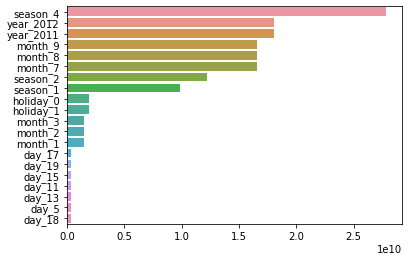

In [40]:
""" 각 피쳐의 회귀계수 시각화 """

coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

# **회귀트리를 이용한 회귀 예측**

In [43]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
gb_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gb_reg, xgb_reg, lgbm_reg]:
  get_model_predict(model, X_train, X_test, y_train, y_test, True)
  print("\n")

""" 트리 모델이 결과가 더 좋게 나옴 """
""" 그러나 이게 트리 모델 회귀가 더 좋다는게 아님 """
""" 데이터셋 유형에 따라 얼마든 달라질 수 있음 """
""" 선형모델과 회귀모델 성능 비교후 결과 좋은걸 도출 """

RandomForestRegressor
RMSLE: 0.353525096496821
RMSE: 50.25022323607409
MAE: 31.08908114376071


GradientBoostingRegressor
RMSLE: 0.32988732189244196
RMSE: 53.335555242778106
MAE: 32.74170818894391


[12:29:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor
RMSLE: 0.3446760204367813
RMSE: 58.245304917740135
MAE: 35.7675583225704


LGBMRegressor
RMSLE: 0.3188456499157367
RMSE: 47.21464677592674
MAE: 29.028770412428237


